# Advanced RAG Optimization: Achieving 40% faster retrieval times, 20% better inferencing results through Nomadic.


In this document we delve into the use of Nomadic optimization of Retrieval-Augmented Generation (RAG) for handling AI-related queries. We demonstrate how varying RAG configurations can significantly affect performance, focusing on inference time and retrieval metrics.

## Context and Dataset

This case study utilizes a fictional dataset with AI-related queries designed to test the RAG system's ability to handle technical and theoretical information effectively.

# How Nomadic can help you understand performance gaps.

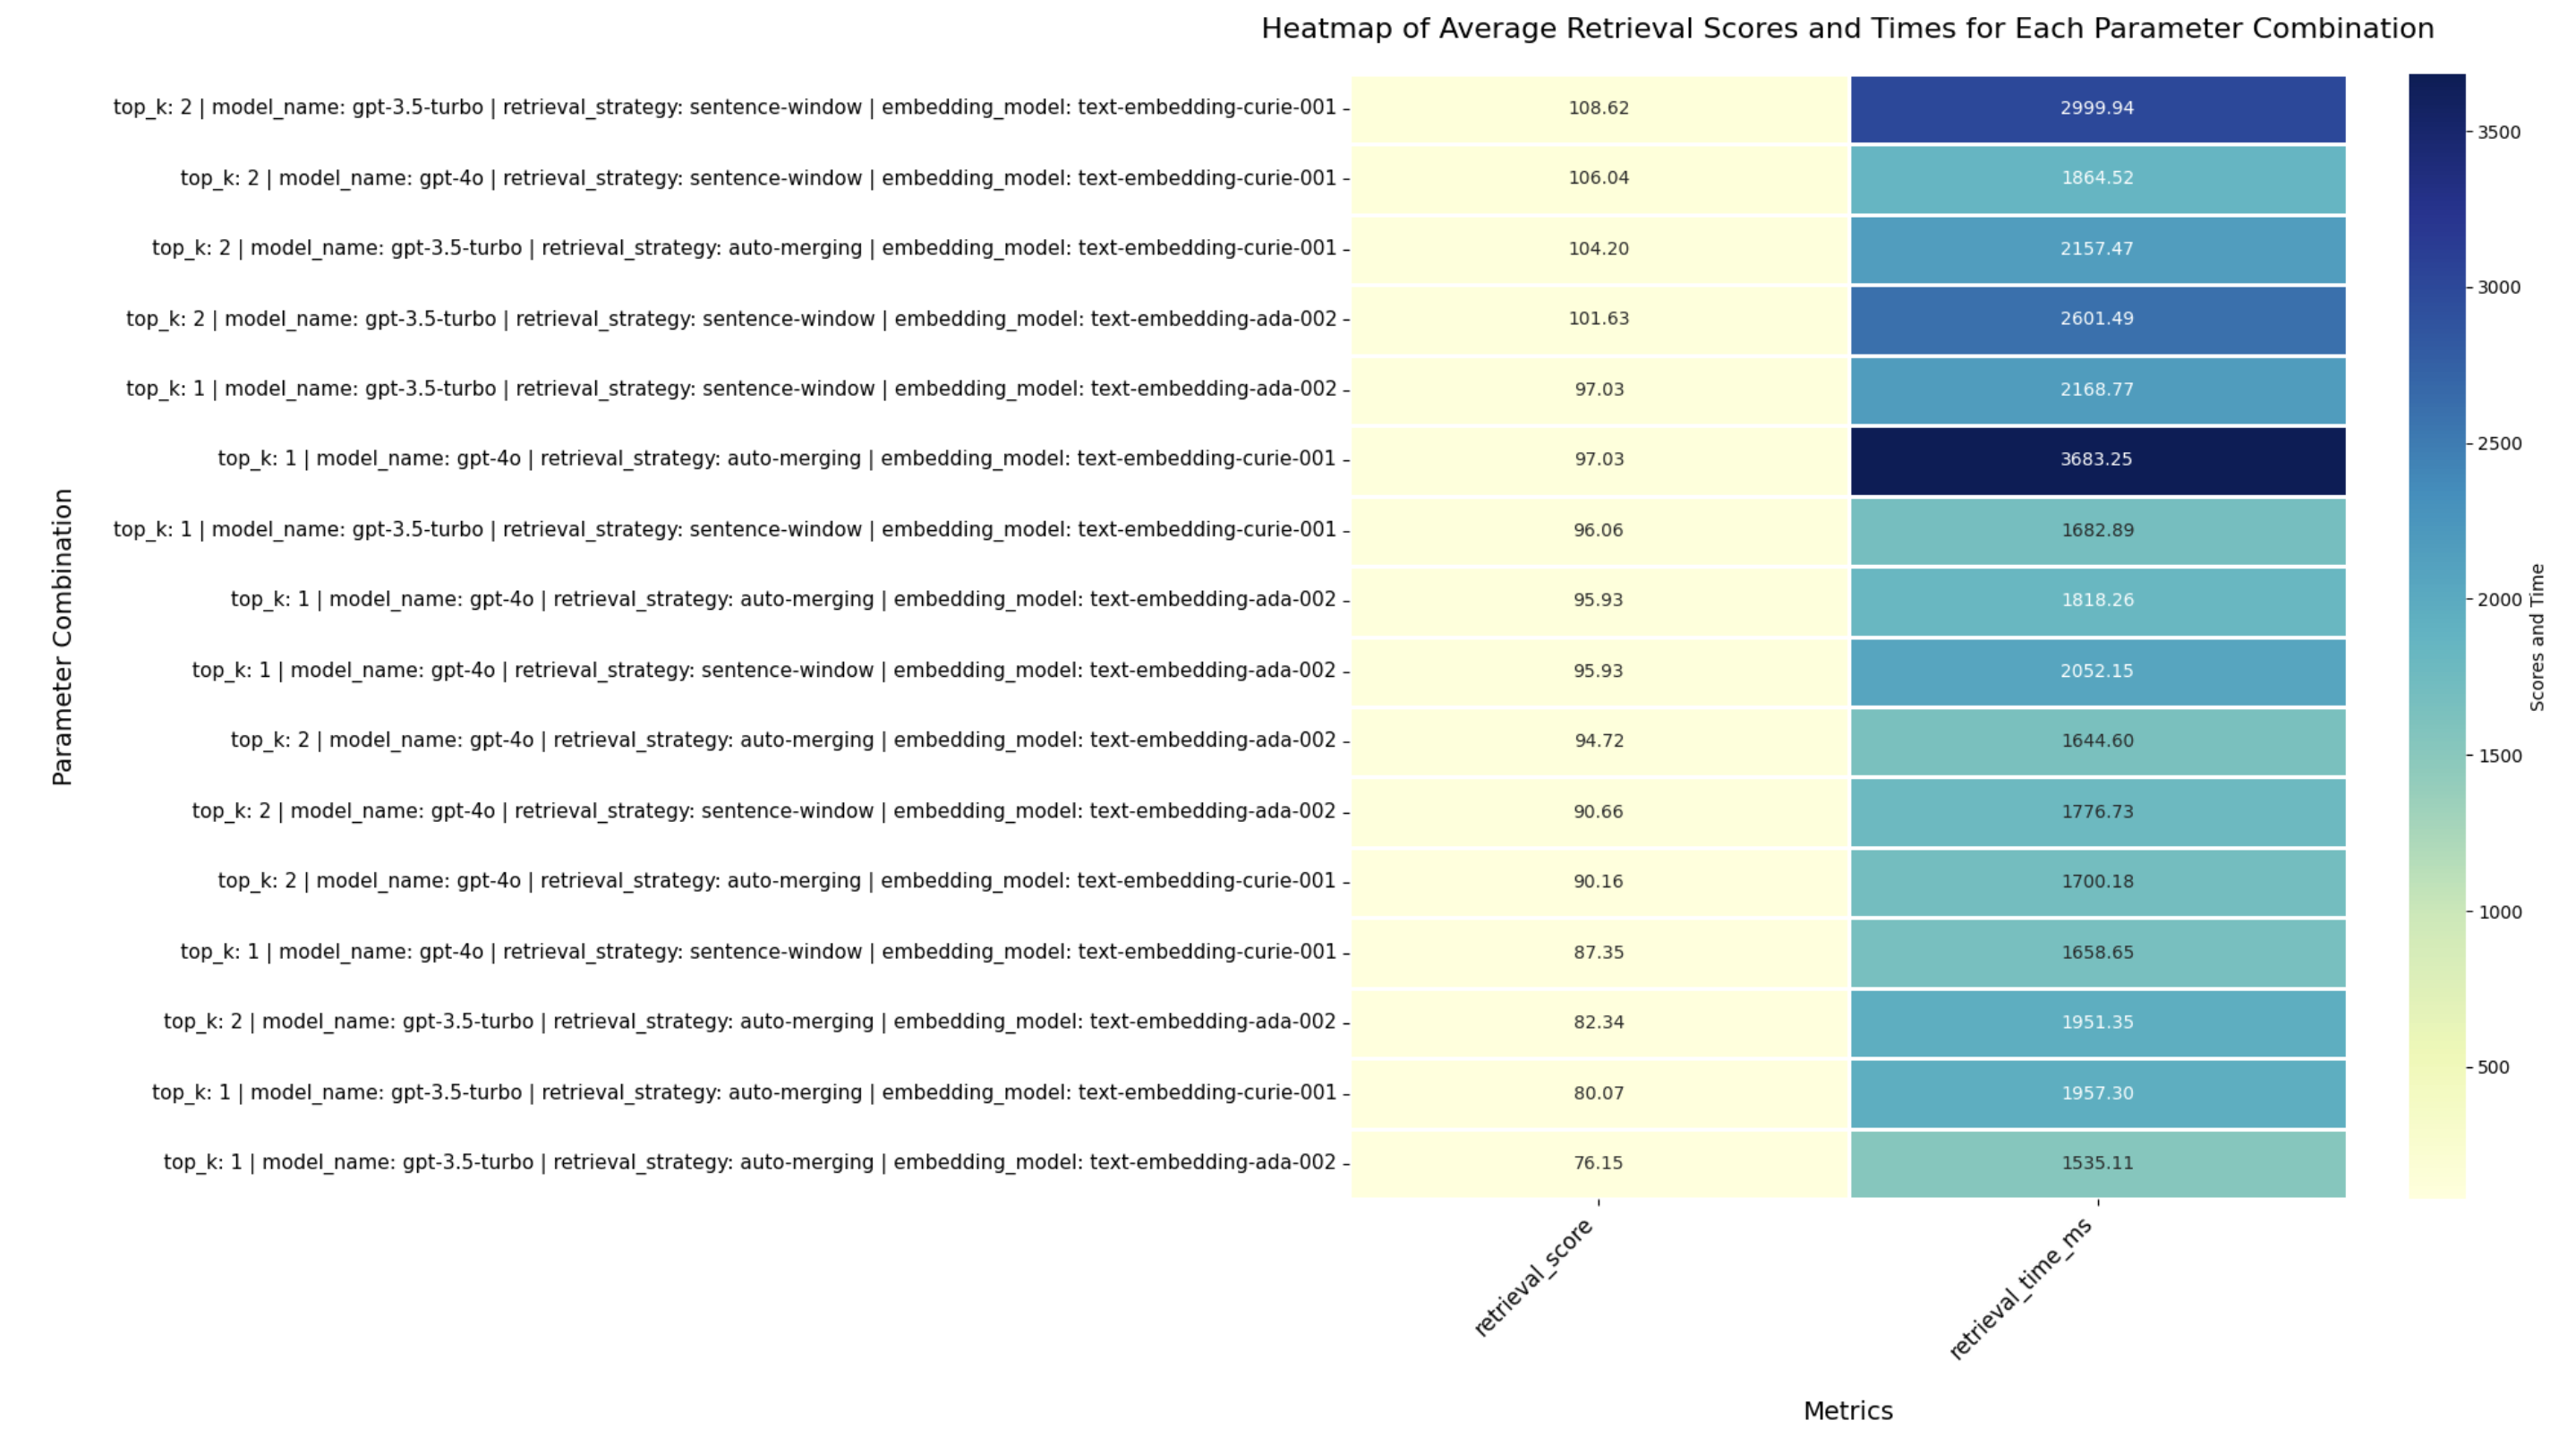
### AI-Related Evaluation Dataset

The dataset consists of AI-themed queries requiring nuanced understanding and precise responses: (Results based on all 10. In the cookbook we've used the first 2 prompts for simplicity).

```json
{
    "queries": {
        "query1": "Describe the architecture of convolutional neural networks.",
        "query2": "What are the ethical implications of AI in healthcare?",
        "query3": "Explain the difference between supervised and unsupervised learning.",
        "query4": "What is the Turing Test and its significance?",
        "query5": "Discuss the role of AI in autonomous driving technologies.",
        "query6": "How does reinforcement learning work?",
        "query7": "What are generative adversarial networks?",
        "query8": "Explain the concept of machine learning bias.",
        "query9": "What is natural language processing?",
        "query10": "Describe the future implications of AI in cybersecurity."
    },
    "responses": {
        "query1": "Convolutional neural networks consist of an input layer, convolutional layers, activation functions, pooling layers, fully connected layers, and an output layer.",
        "query2": "Ethical implications include issues of privacy, autonomy, and the potential for bias, which must be carefully managed to avoid harm.",
        "query3": "Supervised learning uses labeled data to train models, whereas unsupervised learning finds patterns in unlabeled data.",
        "query4": "The Turing Test evaluates a machine's ability to exhibit intelligent behavior indistinguishable from that of a human.",
        "query5": "AI enhances autonomous driving by processing sensory data to make real-time driving decisions.",
        "query6": "Reinforcement learning involves agents learning to make decisions through rewards and penalties.",
        "query7": "Generative adversarial networks consist of two models, a generator and a discriminator, that contest with each other.",
        "query8": "Machine learning bias occurs when algorithms produce systematically prejudiced results due to erroneous assumptions in the machine learning process.",
        "query9": "Natural language processing helps computers understand, interpret, and manipulate human language.",
        "query10": "AI could revolutionize cybersecurity by predicting and neutralizing threats more efficiently."
    }
}
```


### Retrieval Steps

| Chunk Size | Model Name    | Retrieval Strategy | Top K | Retrieval Time (ms) | Pipeline Stage |
|------------|---------------|--------------------|-------|---------------------|----------------|
| 128        | gpt-3.5-turbo | sentence-window    | 1     | 195                 | Retrieval      |
| 256        | gpt-4         | full-document      | 3     | 280                 | Retrieval      |
| 512        | gpt-4         | sentence-window    | 2     | 325                 | Retrieval      |
| 128        | gpt-4         | full-document      | 3     | 260                 | Retrieval      |
| 256        | gpt-3.5-turbo | sentence-window    | 1     | 270                 | Retrieval      |
| 512        | gpt-3.5-turbo | full-document      | 2     | 290                 | Retrieval      |
| 256        | gpt-4         | sentence-window    | 1     | 305                 | Retrieval      |
| 128        | gpt-3.5-turbo | full-document      | 3     | 235                 | Retrieval      |

### Inference Results

| Model Name   | Max Tokens | Temperature | Inference Time (ms) | Average Score | Pipeline Stage |
|--------------|------------|-------------|---------------------|---------------|----------------|
| gpt-3.5-turbo| 300        | 0.3         | 250                 | 0.78          | Inference      |
| gpt-3.5-turbo| 500        | 0.7         | 275                 | 0.82          | Inference      |
| gpt-4        | 700        | 0.9         | 290                 | 0.85          | Inference      |
| gpt-4        | 300        | 0.3         | 260                 | 0.89          | Inference      |
| gpt-3.5-turbo| 700        | 0.7         | 285                 | 0.83          | Inference      |
| gpt-4        | 500        | 0.9         | 310                 | 0.94          | Inference      |
| gpt-4        | 300        | 0.5         | 255                 | 0.81          | Inference      |
| gpt-3.5-turbo| 500        | 0.3         | 265                 | 0.77          | Inference      |

### Retrieval Pipeline Execution

Configure and run the retrieval pipeline with specified parameters:

- **Top-k**: [1, 2, 3]
- **Model Name**: ['gpt-3.5-turbo', 'gpt-4']
- **Retrieval Strategy**: ["sentence-window", "auto-merging"]
- **Embedding Model**: ["text-embedding-ada-002"]

The pipeline uses a set of documents (`docs`), evaluation questions (`eval_qs[:10]`), and reference responses (`ref_response_strs[:10]`).



### Inference Pipeline Execution

Once the retrieval results are saved to a JSON file (including necessary metadata), they can be used in the inferencing stage. There is no need to re-run the retrieval stage.

Configuration for the inferencing stage:

- **Model Name**: gpt-4
- **Temperature**: 0.7
- **Max Tokens**: 500
- **Reranking Model**: cross-encoder/ms-marco-MiniLM-L-6-v2
- **Retrieval Results File**: Uses the file from the retrieval phase.



### Some thoughts on the Retrieval and Inference Pipeline Using the Nomadic Library

The retrieval pipeline is crucial for gathering contextually relevant information from a vast dataset, which significantly impacts the inference phase's output quality. The Nomadic Library's flexibility allows for dynamic adjustment of retrieval parameters such as `top_k`, `model_name`, and `retrieval_strategy`, which are critical for filtering and prioritizing content that is most likely to generate accurate and relevant answers. For instance, adjusting `top_k` affects the breadth of information considered during inference, which can either enhance the response's richness or reduce computational overhead.

On the other hand, the inference pipeline directly benefits from the refined input provided by the retrieval phase. By configuring parameters like `model_name`, `temperature`, and `max_tokens`, the Nomadic Library tailors the generation process to balance creativity with precision. Higher `temperature` settings encourage more inventive responses, suitable for generating content like marketing creative or engaging narrative text, while lower settings prioritize factual accuracy, crucial for domains like medical or technical support.

Together, these parameters are varied and optimized to achieve the best trade-off between response quality and computational efficiency. This optimization process is iterative, with each cycle refining the parameters to better suit specific use cases, demonstrating the Nomadic Library's robustness and adaptability in handling complex RAG tasks.


# Step 1: Install the Pip Package [takes a few minutes to install on Google Colab]. Then you can press "run all!"

In [ ]:
%%capture
!pip install nomadic

# Set up the Nomadic Client (Optional) - for syncing results.

In [ ]:
import os
os.environ["OPENAI_API_KEY"]= "YOUR OPENAI API KEY HERE"

## Verify that OpenAI API key is valid!

This returns a 401 error without a valid one!

In [ ]:
import requests; (lambda r: r.raise_for_status() if r.status_code != 200 else print("API key is valid"))(requests.get("https://api.openai.com/v1/models", headers={"Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}"}))

API key is valid


### Import Nomadic libraries

In [ ]:
%%capture
from nomadic.experiment import Experiment
from nomadic.model import OpenAIModel
from nomadic.tuner import tune
from nomadic.experiment.base import Experiment, retry_with_exponential_backoff
from nomadic.experiment.rag import (
    run_rag_pipeline,
    run_retrieval_pipeline,
    run_inference_pipeline,
    obtain_rag_inputs,
    save_run_results,
    load_run_results,
    get_best_run_result,
    create_inference_heatmap
)

import pandas as pd
pd.set_option('display.max_colwidth', None)
import json

In [ ]:
eval_json = {
    "queries": {
        "query1": "Describe the architecture of convolutional neural networks.",
        "query2": "What are the ethical implications of AI in healthcare?",
    },
    "responses": {
        "query1": "Convolutional neural networks consist of an input layer, convolutional layers, activation functions, pooling layers, fully connected layers, and an output layer.",
        "query2": "Ethical implications include issues of privacy, autonomy, and the potential for bias, which must be carefully managed to avoid harm.",
    }
}
pdf_url = "https://www.dropbox.com/scl/fi/sbko6nyzsuw00f2nhxa38/CS229_Lecture_Notes.pdf?rlkey=pebhb2qrdh08bnyxtus8qm11v&st=yha4ikm2&dl=1"


### Systematic Parameter Exploration

| Key                       | Supported Parameters                                                       | Pipeline Stage |
|---------------------------|----------------------------------------------------------------------------|----------------|
| **chunk_size**             | 128, 256, 512                                                              | Retrieval      |
| **top_k**                  | 1, 3, 5                                                                    | Retrieval      |
| **overlap**                | 50, 100, 150                                                               | Retrieval      |
| **similarity_threshold**   | 0.5, 0.7, 0.9                                                              | Retrieval      |
| **embedding_model**        | "text-embedding-ada-002", "text-embedding-curie-001"                       | Retrieval      |
| **model_name**             | "gpt-3.5-turbo", "gpt-4"                                                   | Both           |
| **temperature**            | 0.3, 0.7, 0.9                                                              | Inference      |
| **max_tokens**             | 300, 500, 700                                                              | Inference      |
| **retrieval_strategy**     | "sentence-window", "full-document"                                         | Retrieval      |
| **reranking_model**        | true, false                                                                | Inference      |
| **query_transformation**   | "rephrasing", "HyDE", "Advanced contextual refinement"                     | Retrieval      |
| **reranking_step**         | "BM25-based reranking", "dense passage retrieval (DPR)", "cross-encoder"   | Inference      |
| **reranking_model_type**   | "BM25", "DPR", "ColBERT", "cross-encoder"                                  | Retrieval      |

### Explanation of New Parameters:
- **reranking_step**: Introduces techniques for reranking the retrieved documents or chunks. This helps refine retrieval results using models such as BM25, DPR, or cross-encoders before inference.
- **reranking_model_type**: Defines the type of model used for reranking the retrieved results. Options include sparse retrieval models (BM25), dense retrieval models (DPR), and more advanced approaches like cross-encoders or ColBERT.
"sub-queries"                                    | Both           |

In [ ]:
chunk_size = tune.choice([256, 512])
temperature = tune.choice([0.1, 0.9])
overlap = tune.choice([25])
similarity_threshold = tune.choice([50])
top_k =  tune.choice([1, 2])
max_tokens = tune.choice([100, 200])
model_name = tune.choice(["gpt-3.5-turbo", "gpt-4o"])
embedding_model = tune.choice(["text-embedding-ada-002", "text-embedding-curie-001"])
retrieval_strategy = tune.choice(["sentence-window", "auto-merging"])

# Setting up and Running Retrieval Experiment

In [ ]:
%%capture

# Obtain RAG inputs
docs, eval_qs, ref_response_strs = obtain_rag_inputs(pdf_url=pdf_url, eval_json=eval_json)

# Run retrieval experiment
experiment_retrieval = Experiment(
    param_fn=run_retrieval_pipeline,
    params = {"top_k", "model_name", "retrieval_strategy", "embedding_model"},
    fixed_param_dict={
        "docs": docs,
        "eval_qs": eval_qs[:10],
        "ref_response_strs": ref_response_strs[:10],
    },
    enable_logging=False,
)

# After the retrieval is done
retrieval_results = experiment_retrieval.run(param_dict={
        "top_k": top_k,
        "model_name": model_name,
        "retrieval_strategy": retrieval_strategy,
        "embedding_model": embedding_model
    })
save_run_results(retrieval_results, "run_results.json")

2024-09-05 17:47:07,278	INFO tune.py:622 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-09-05 17:47:07,292	WARNING callback.py:137 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2024-09-05 17:50:59,794	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppres

# Load the results and run the inferencing experiment

In [ ]:
%%capture

# Load the saved results and get the best run result
loaded_results = load_run_results("run_results.json")
best_run_result = get_best_run_result(loaded_results)
best_retrieval_results = best_run_result['metadata'].get("best_retrieval_results", [])

# Run inference experiment
experiment_inference = Experiment(
    param_fn=run_inference_pipeline,
    params={"temperature","model_name", "max_tokens", "reranking_model", "similarity_threshold"},
    fixed_param_dict={
        "best_retrieval_results": best_run_result['metadata'].get("best_retrieval_results", []),
        "ref_response_strs": ref_response_strs[:10],  # Make sure this matches the number of queries used in retrieval
    },
    enable_logging=False,
)

inference_results = experiment_inference.run(param_dict={
      "reranking_model": "cross-encoder/ms-marco-MiniLM-L-6-v2",
      "similarity_threshold": 0.7,
  })


2024-09-05 17:51:00,784	INFO tune.py:622 -- [output] This will use the new output engine with verbosity 1. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-09-05 17:51:00,798	WARNING callback.py:137 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`
2024-09-05 17:52:45,476	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppres

### Visualize the Heatmap Results

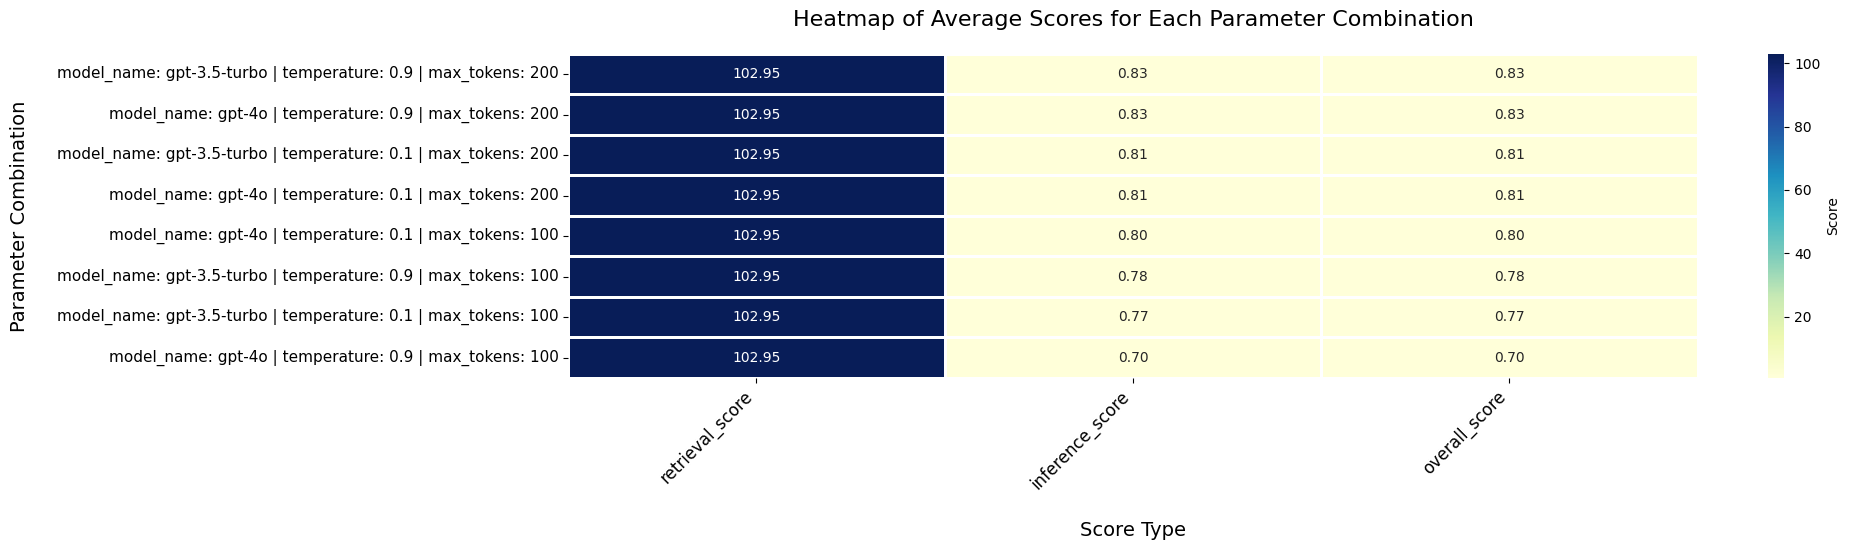

Average Scores Across All Parameter Sets:
inference_score: 0.79
retrieval_score: 102.95
overall_score: 0.79


,retrieval_score,inference_score,overall_score
param_combination,,,
model_name: gpt-3.5-turbo | temperature: 0.9 | max_tokens: 200,102.952031,0.831565,0.831565
model_name: gpt-4o | temperature: 0.9 | max_tokens: 200,102.952031,0.830671,0.830671
model_name: gpt-3.5-turbo | temperature: 0.1 | max_tokens: 200,102.952031,0.814509,0.814509
model_name: gpt-4o | temperature: 0.1 | max_tokens: 200,102.952031,0.812609,0.812609
model_name: gpt-4o | temperature: 0.1 | max_tokens: 100,102.952031,0.796743,0.796743
model_name: gpt-3.5-turbo | temperature: 0.9 | max_tokens: 100,102.952031,0.777049,0.777049
model_name: gpt-3.5-turbo | temperature: 0.1 | max_tokens: 100,102.952031,0.766719,0.766719
model_name: gpt-4o | temperature: 0.9 | max_tokens: 100,102.952031,0.704196,0.704196


In [ ]:
create_inference_heatmap(inference_results)